In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("./data/weight-height.csv")
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


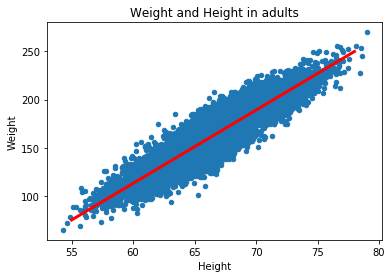

In [3]:
df.plot(kind='scatter',
       x = 'Height',
       y = 'Weight',
       title = 'Weight and Height in adults')
plt.plot([55, 78], [75, 250], color='red', linewidth=3)

In [4]:
def line(x, w = 0, b = 0):
    return x * w + b

In [5]:
x = np.linspace(55, 80, 100)
x

array([ 55.        ,  55.25252525,  55.50505051,  55.75757576,
        56.01010101,  56.26262626,  56.51515152,  56.76767677,
        57.02020202,  57.27272727,  57.52525253,  57.77777778,
        58.03030303,  58.28282828,  58.53535354,  58.78787879,
        59.04040404,  59.29292929,  59.54545455,  59.7979798 ,
        60.05050505,  60.3030303 ,  60.55555556,  60.80808081,
        61.06060606,  61.31313131,  61.56565657,  61.81818182,
        62.07070707,  62.32323232,  62.57575758,  62.82828283,
        63.08080808,  63.33333333,  63.58585859,  63.83838384,
        64.09090909,  64.34343434,  64.5959596 ,  64.84848485,
        65.1010101 ,  65.35353535,  65.60606061,  65.85858586,
        66.11111111,  66.36363636,  66.61616162,  66.86868687,
        67.12121212,  67.37373737,  67.62626263,  67.87878788,
        68.13131313,  68.38383838,  68.63636364,  68.88888889,
        69.14141414,  69.39393939,  69.64646465,  69.8989899 ,
        70.15151515,  70.4040404 ,  70.65656566,  70.90

In [6]:
yhat = line(x, w = 0, b=0)

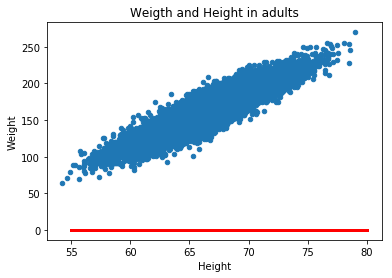

In [7]:
df.plot(kind='scatter',
        x = 'Height',
        y = 'Weight',
        title='Weigth and Height in adults')
plt.plot(x, yhat, color='red', linewidth=3)

In [8]:
def mean_squared_error(y_true, y_pred):
    s = (y_true - y_pred)**2
    return s.mean()

In [9]:
X = df[['Height']].values
y_true = df['Weight'].values

In [10]:
y_true

array([ 241.89356318,  162.31047252,  212.74085556, ...,  128.47531878,
        163.85246135,  113.64910268])

In [11]:
y_pred = line(X)

In [12]:
y_pred

array([[ 0.],
       [ 0.],
       [ 0.],
       ..., 
       [ 0.],
       [ 0.],
       [ 0.]])

In [ ]:
mean_squared_error(y_true, y_pred.ravel())

27093.83757456157

In [ ]:
plt.figure(figsize=(10, 5))

# we are going to draw 2 plots in the same figure
# first plot, data and a few lines
ax1 = plt.subplot(121)
df.plot(kind='scatter',
        x='Height',
        y='Weight',
        title='Weight and Height in adults', ax=ax1)

# let's explore the cost function for a few values of b between -100 and +150
bbs = np.array([-100, -50, 0, 50, 100, 150])
mses = []  # we will append the values of the cost here, for each line
for b in bbs:
    y_pred = line(X, w=2, b=b)
    mse = mean_squared_error(y_true, y_pred)
    mses.append(mse)
    plt.plot(X, y_pred)

# second plot: Cost function
ax2 = plt.subplot(122)
plt.plot(bbs, mses, 'o-')
plt.title('Cost as a function of b')
plt.xlabel('b')

In [8]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam, SGD

Using TensorFlow backend.


In [ ]:
model = Sequential()
model.add(Dense(1, input_shape=(1,)))
model.summary()

In [ ]:
model.compile(Adam(lr=0.8), 'mean_squared_error')

In [ ]:
model.fit(X, y_true, epochs=50)

In [ ]:
y_pred = model.predict(X)

In [ ]:
df.plot(kind='scatter',
           x = 'Height',
           y = 'Weight',
           title='Weight and Height in adults')
plt.plot(X, y_pred, color='red')

In [ ]:
W, b = model.get_weights()

In [ ]:
W

In [ ]:
b

### Evaluating model performance

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_true, random_state=42)

In [ ]:
len(X_train)

In [ ]:
len(X_test)

In [ ]:
W[0, 0] = 0.0
b[0] = 0.0
model.set_weights((W, b))

In [ ]:
y_train_pred = model.predict(X_train).ravel()
y_test_pred = model.predict(X_test).ravel()

In [ ]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

print("The Mean Squared Error on the Train set is:\t{:0.1f}".format(mse(y_train, y_train_pred)))
print("The Mean Squared Error on the Test set is:\t{:0.1f}".format(mse(y_test, y_test_pred)))

print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_train, y_train_pred)))
print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test, y_test_pred)))

### Classification

In [5]:
df = pd.read_csv("./data/user_visit_duration.csv")
df.head()

,Time (min),Buy
0,2.000000,0
1,0.683333,0
2,3.216667,1
3,0.900000,0
4,1.533333,1


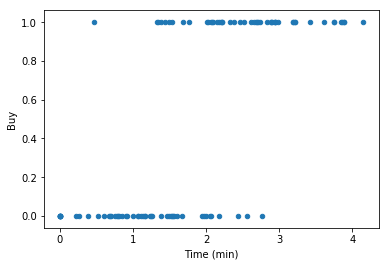

In [6]:
df.plot(kind='scatter', x = 'Time (min)', y='Buy')

In [9]:
model = Sequential()
model.add(Dense(1, input_shape=(1,), activation='sigmoid'))
model.compile(SGD(lr=0.5), 'binary_crossentropy', metrics=['accuracy'])

In [10]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [12]:
X = df[['Time (min)']].values
y = df['Buy'].values

model.fit(X, y, epochs=25)

Epoch 1/25
100/100 [==============================] - 0s 3ms/step - loss: 0.8721 - acc: 0.5800
Epoch 2/25
100/100 [==============================] - 0s 84us/step - loss: 0.5600 - acc: 0.6600
Epoch 3/25
100/100 [==============================] - 0s 146us/step - loss: 0.5087 - acc: 0.7800
Epoch 4/25
100/100 [==============================] - 0s 107us/step - loss: 0.4879 - acc: 0.7900
Epoch 5/25
100/100 [==============================] - 0s 88us/step - loss: 0.4793 - acc: 0.8000
Epoch 6/25
100/100 [==============================] - 0s 108us/step - loss: 0.4776 - acc: 0.8100

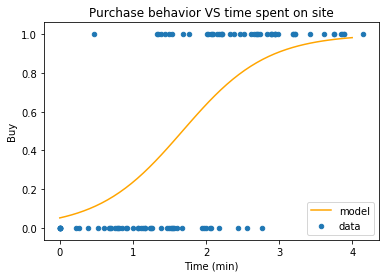

In [13]:
ax = df.plot(kind='scatter', x='Time (min)', y='Buy',
             title='Purchase behavior VS time spent on site')

temp = np.linspace(0, 4)
ax.plot(temp, model.predict(temp), color='orange')
plt.legend(['model', 'data'])

In [17]:
temp_class = model.predict(temp) > 0.5

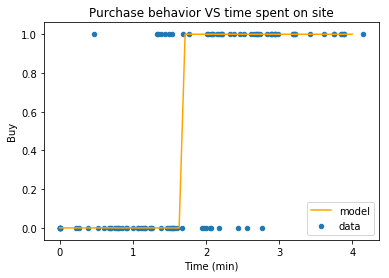

In [18]:
ax = df.plot(kind='scatter', x='Time (min)', y='Buy',
             title='Purchase behavior VS time spent on site')

temp = np.linspace(0, 4)
ax.plot(temp, temp_class, color='orange')
plt.legend(['model', 'data'])

In [19]:
y_pred = model.predict(X)
y_class_pred = y_pred > 0.5

In [24]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [21]:
print("The accuracy score is {:0.3f}".format(accuracy_score(y, y_class_pred)))

The accuracy score is 0.840


In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [26]:
params = model.get_weights()
params = [np.zeros(w.shape) for w in params]
model.set_weights(params)

In [27]:
print("The accuracy score is {:0.3f}".format(accuracy_score(y, model.predict(X) > 0.5)))

The accuracy score is 0.500


In [28]:
model.fit(X_train, y_train, epochs=25, verbose=0)

In [29]:
print("The train accuracy score is {:0.3f}".format(accuracy_score(y_train, model.predict(X_train) > 0.5)))
print("The test accuracy score is {:0.3f}".format(accuracy_score(y_test, model.predict(X_test) > 0.5)))

The train accuracy score is 0.800
The test accuracy score is 0.900


### Cross validation

In [30]:
from keras.wrappers.scikit_learn import KerasClassifier

In [31]:
def build_logistic_regression_model():
    model = Sequential()
    model.add(Dense(1, input_shape=(1,), activation='sigmoid'))
    model.compile(SGD(lr=0.5),
                  'binary_crossentropy',
                  metrics=['accuracy'])
    return model

In [32]:
model = KerasClassifier(build_fn=build_logistic_regression_model,
                        epochs=25,
                        verbose=0)

In [33]:
from sklearn.model_selection import cross_val_score, KFold

In [34]:
cv = KFold(3, shuffle=True)

In [35]:
scores = cross_val_score(model, X, y, cv=cv)

In [36]:
scores

array([ 0.85294118,  0.81818182,  0.78787879])

In [37]:
print("The cross validation accuracy is {:0.4f} ± {:0.4f}".format(scores.mean(), scores.std()))

The cross validation accuracy is 0.8197 ± 0.0266


## Confusion Matrix

In [38]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y, y_class_pred)
def pretty_confusion_matrix(y_true, y_pred, labels=["False", "True"]):
    cm = confusion_matrix(y_true, y_pred)
    pred_labels = ['Predicted '+ l for l in labels]
    df = pd.DataFrame(cm, index=labels, columns=pred_labels)
    return df

In [39]:
pretty_confusion_matrix(y, y_class_pred, ['Not Buy', 'Buy'])

,Predicted Not Buy,Predicted Buy
Not Buy,41,9
Buy,7,43


In [40]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [41]:
print("Precision:\t{:0.3f}".format(precision_score(y, y_class_pred)))
print("Recall:  \t{:0.3f}".format(recall_score(y, y_class_pred)))
print("F1 Score:\t{:0.3f}".format(f1_score(y, y_class_pred)))

Precision:	0.827
Recall:  	0.860
F1 Score:	0.843


In [42]:
from sklearn.metrics import classification_report

In [43]:
print(classification_report(y, y_class_pred))

             precision    recall  f1-score   support

          0       0.85      0.82      0.84        50
          1       0.83      0.86      0.84        50

avg / total       0.84      0.84      0.84       100



### Feature processing

##### 1> Rescale with fixed factor

In [44]:
df = pd.read_csv('./data/weight-height.csv')
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [45]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [46]:
pd.get_dummies(df['Gender'], prefix='Gender').head()

,Gender_Female,Gender_Male
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


### Feature Transformations

#### 1> Rescale with fixed factor

In [47]:
df['Height (feet)']  = df['Height']/12.0
df['Weight (100 lbs)'] = df['Weight']/100.0

In [48]:
df.describe().round(2)

,Height,Weight,Height (feet),Weight (100 lbs)
count,10000.00,10000.00,10000.00,10000.00
mean,66.37,161.44,5.53,1.61
std,3.85,32.11,0.32,0.32
min,54.26,64.70,4.52,0.65
25%,63.51,135.82,5.29,1.36
50%,66.32,161.21,5.53,1.61
75%,69.17,187.17,5.76,1.87
max,79.00,269.99,6.58,2.70


In [49]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
df['Weight_mms'] = mms.fit_transform(df[['Weight']])
df['Height_mms'] = mms.fit_transform(df[['Height']])
df.describe().round(2)

,Height,Weight,Height (feet),Weight (100 lbs),Weight_mms,Height_mms
count,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00
mean,66.37,161.44,5.53,1.61,0.47,0.49
std,3.85,32.11,0.32,0.32,0.16,0.16
min,54.26,64.70,4.52,0.65,0.00,0.00
25%,63.51,135.82,5.29,1.36,0.35,0.37
50%,66.32,161.21,5.53,1.61,0.47,0.49
75%,69.17,187.17,5.76,1.87,0.60,0.60
max,79.00,269.99,6.58,2.70,1.00,1.00


#### 3> Standard deviation

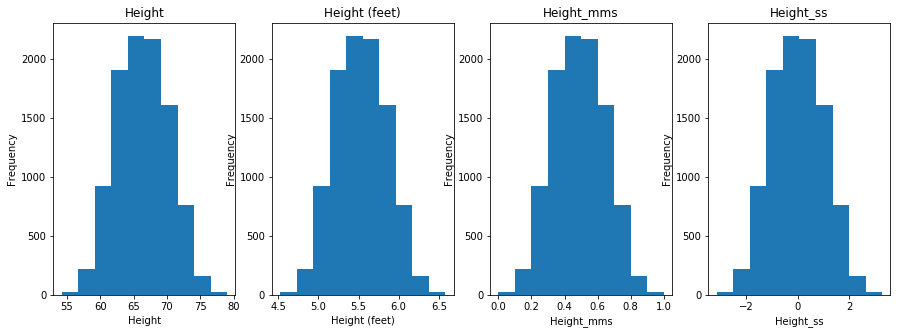

In [51]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
df['Weight_ss'] = ss.fit_transform(df[['Weight']])
df['Height_ss'] = ss.fit_transform(df[['Height']])
df.describe().round(2)

plt.figure(figsize=(15, 5))

for i, feature in enumerate(['Height', 'Height (feet)', 'Height_mms', 'Height_ss']):
    plt.subplot(1, 4, i+1)
    df[feature].plot(kind='hist', title=feature)
    plt.xlabel(feature)